# 상관분석

## 상관(관계) 분석 이해

In [3]:
# 두 변수간 선형적 상관성을 확인하는 관계분석  , t-test : 차이검정
# 피어슨, 스피어만, 캔달
# 상관계수 : 선형관계 정도를 수치화  -1~ 1 사이의 값을 갖는다.  (공분산의 값의 범위: 무한대)
# -1 또는 1 에 가까울수록 상관성이 크고, 0에 가까우면 상관성이 작다.

# 상관계수 (Correlation  Coefficient) 계산 
# 두 변수의 공분산 값을 각각의 표준편차의 곱으로 나눈 값으로,  공분산을 표준화한 개념으로 이해
# 공분산 : 편차와 편차의 곱에 기대치

In [1]:
# 라이브러리 불러오기

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp


# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 아래는 각 동별 수용자 수용성적 list 데이터

A=[90,90,80,70]
B=[65,85,100,90]
C=[80,60,70,90]


In [4]:
A

[90, 90, 80, 70]

In [5]:
B

[65, 85, 100, 90]

In [103]:
# 파이썬 list를 DataFrame으로 만드는 방법

# DataFrame  Row, Column, Series 들로 구성 : 7주차 pandas 수업 참고할 것 · 

In [18]:
score = pd.DataFrame({"A":[90,90,80,70], "B":[65,85,100,90], "C":[80,60,70,90]})


In [19]:
score

,A,B,C
0,90,65,80
1,90,85,60
2,80,100,70
3,70,90,90


## 피어슨(Pearson) 상관계수 구하기

In [20]:
# 상관계수 구하는 방법 : 데이터프레임의 이름.corr(method='pearson')      # Correlation  Coefficient (상관계수)

In [21]:
score_corr = score.corr(method = 'pearson')

In [22]:
score_corr

,A,B,C
A,1.000000,-0.591312,-0.674200
B,-0.591312,1.000000,-0.175412
C,-0.674200,-0.175412,1.000000


In [17]:
# 결과 해석

In [110]:
# A 동수용자 성적과 B 수용자 음(-) -0.591312
# A 동수용자 성적과 C 수용자 음(-) -0.674200
# B 동수용자 성적과 C 수용자 음(-) -0.175412 --> 0에 가깝다. 

## 히트맵 그리기

In [111]:
# 데이터프레임에서 .values를 하게되면 데이터프레임의 각 행이 마치 리스트 형태로 변환되어서 출력 
# --> 차트를 그릴 때, 입력으로 사용할 것

In [112]:
score_corr.values

array([[ 1.        , -0.5913124 , -0.67419986],
       [-0.5913124 ,  1.        , -0.1754116 ],
       [-0.67419986, -0.1754116 ,  1.        ]])

In [113]:
# 차트에 이름을 입력하기
# column_names라는 리스트를 만든다.

In [24]:
import seaborn as sns


# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [25]:
column_names = ['A', 'B', 'C']

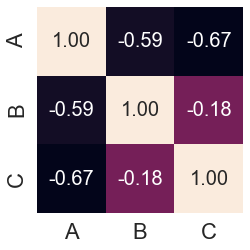

In [26]:
# 레이블의 폰트 사이즈를 조정
sns.set(font_scale=2.0)


score_corr_heatmap = sns.heatmap(score_corr.values, # 수용자 점수 데이터
                          cbar = False, # 오른쪽 컬러 막대 출력 여부
                           annot = True, # 차트에 숫자를 보여줄 것인지 여부
                          annot_kws={'size' : 20}, # 숫자 출력 시 숫자 크기 조절
                           fmt = '.2f', # 숫자의 출력 소수점자리 개수 조절
                           square = 'True', # 차트를 정사각형으로 할 것인지
                          yticklabels=column_names, # y축에 컬럼명 출력
                          xticklabels=column_names) # x축에 컬럼명 출력
plt.tight_layout()
plt.show()

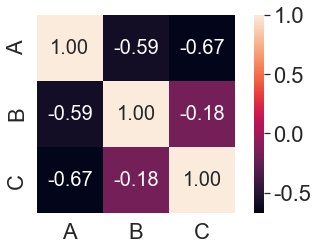

In [117]:
#  오른쪽 컬러 막대 출력 여부 변경 사례 
sns.set(font_scale=2.0)

test_heatmap = sns.heatmap(score_corr.values, # 수용자 점수 데이터
                          cbar = True, # 오른쪽 컬러 막대 출력 여부
                           annot = True, # 차트에 숫자를 보여줄 것인지 여부
                          annot_kws={'size' : 20}, # 숫자 출력 시 숫자 크기 조절
                           fmt = '.2f', # 숫자의 출력 소수점자리 개수 조절
                           square = 'True', # 차트를 정사각형으로 할 것인지
                          yticklabels=column_names, # y축에 컬럼명 출력
                          xticklabels=column_names) # x축에 컬럼명 출력
plt.tight_layout()
plt.show()

## 산점도(scatter)로 살펴보기

In [28]:
# 아래 리스트 A 동과 B동
import pandas as pd

A=[90,90,80,70]
B=[65,85,100,90]

In [29]:
# DataFrame 만들기

score = pd.DataFrame({'A': A, 'B': B})

In [30]:
# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [31]:
A=[90,90,80,70]
B=[65,85,100,90]

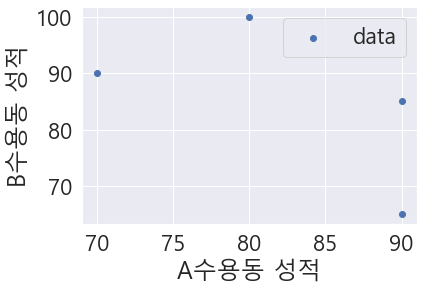

In [34]:
# 산점도(scatter) 그리기

import matplotlib.pylab as plt  # 라이브러리 불러오기 

plt.scatter( score['A'],score['B'], label = "data")

plt.legend(loc = "best")
plt.xlabel('A수용동 성적')
plt.ylabel('B수용동 성적')
plt.show()

In [35]:
E=[10,20,30,40,40, 60, 70, 80, 90, 100, 110, 111]
F=[5,15,19,25, 35, 45, 55, 68, 77, 80, 90, 98]

In [36]:
score1 = pd.DataFrame({'E': E, 'F': F})

In [39]:
score1

,E,F
0,10,5
1,20,15
2,30,19
3,40,25
4,40,35
5,60,45
6,70,55
7,80,68
8,90,77
9,100,80


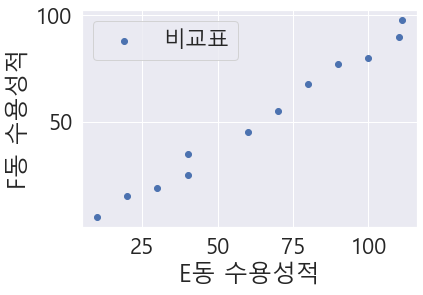

In [41]:
# 산점도(scatter) 그리기

import matplotlib.pylab as plt  # 라이브러리 불러오기 

plt.scatter( score1['E'],score1['F'], label = "비교표")

plt.legend(loc = "best")
plt.xlabel('E동 수용성적')
plt.ylabel('F동 수용성적')
plt.show()

In [125]:
# 결과 : 강한 양(+)의 상관관계로 보임

In [137]:
# 리스트를 데이터 프레임으로 만들기

score1 = pd.DataFrame({"E":[10,20,30,40,40, 60, 70, 80, 90, 100, 110, 111],"F":[5,15,19,25, 35, 45, 55, 68, 77, 80, 90,98]})
score1

,E,F
0,10,5
1,20,15
2,30,19
3,40,25
4,40,35
5,60,45
6,70,55
7,80,68
8,90,77
9,100,80


In [42]:
score1_corr = score1.corr(method = 'pearson')

In [43]:
score1_corr

,E,F
E,1.000000,0.994167
F,0.994167,1.000000


In [129]:
# 결과 해석 : 상관계수 범위 -1~ 1 ==>  E와 F 상관계수 0.994167

# 실습 (범죄데이터 불러오기) 1


In [98]:
# ("crime_list.csv")

In [44]:
# 판다스 부분에서 했었던 데이터 불러오기
# 앞에서 실습한 파일 : crime_list.csv 사용

crime_list = pd.read_csv("crime_list.csv")

crime_list

,날짜,ID,나이,성별,소득,범죄건수
0,2022-11-24,1,71,여성,141440,5
1,2022-02-27,2,67,남성,122769,4
2,2022-01-13,3,67,남성,122908,2
3,2022-05-21,4,21,여성,79638,7
4,2022-05-06,5,32,남성,57388,8
...,...,...,...,...,...,...
95,2022-12-19,96,29,남성,65745,5
96,2022-10-13,97,50,여성,135456,4
97,2022-04-23,98,76,남성,29016,3
98,2022-12-17,99,24,여성,135247,3


## 데이터 불러오기

In [47]:
# 판다스 부분에서 했었던 데이터 불러오기
# 앞에서 실습한 파일 : crime_list.csv 사용

crime_list = pd.read_csv("crime_list.csv")

crime_list

,날짜,ID,나이,성별,소득,범죄건수
0,2022-11-24,1,71,여성,141440,5
1,2022-02-27,2,67,남성,122769,4
2,2022-01-13,3,67,남성,122908,2
3,2022-05-21,4,21,여성,79638,7
4,2022-05-06,5,32,남성,57388,8
...,...,...,...,...,...,...
95,2022-12-19,96,29,남성,65745,5
96,2022-10-13,97,50,여성,135456,4
97,2022-04-23,98,76,남성,29016,3
98,2022-12-17,99,24,여성,135247,3


## 시각화 

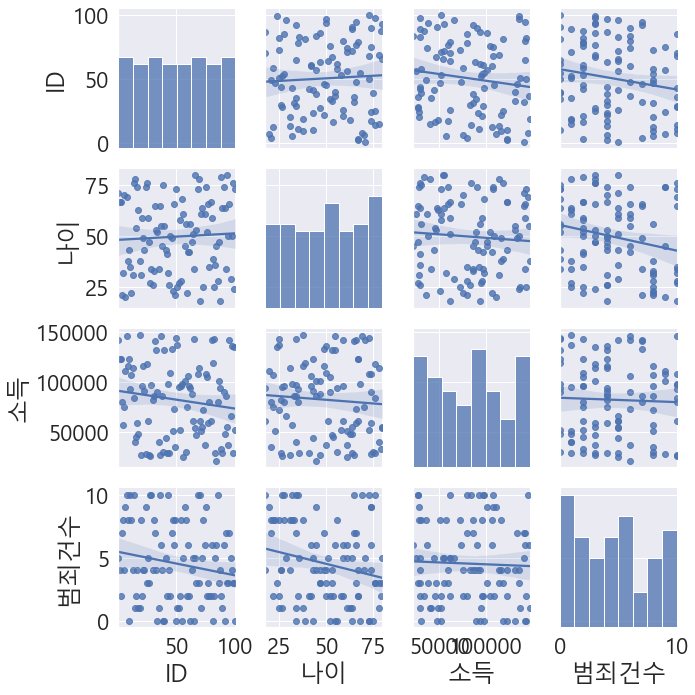

In [48]:
# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(crime_list, kind='reg')
plt.show()

## 피어슨 상관 계수

In [49]:
# 하나씩 시행해보기
# 변수 지정, 소득과 범죄건수
x1 = crime_list['나이']
x2 = crime_list['범죄건수']

# 만약 표본상관계수를 도출하게 된다면 (n-1로 또 나눠주어야 함)
# mu = mean (공통적으로 적용)
mu_1 = np.sum(x1)/len(x1)
mu_2 = np.sum(x2)/len(x2)
# 분산을 구하는 부분에서도 모분산 추정이므로 자유도 1 설정
var_1 = np.sum([pow(i - mu_1, 2) for i in x1]) / (len(x1) - 1)
var_2 = np.sum([pow(i - mu_2, 2) for i in x2]) / (len(x2) - 1)
std_1 = var_1 ** 0.5
std_2 = var_2 ** 0.5

covariance_ddof = sum( (x1 - mu_1) * (x2 - mu_2) ) / (len(x1) -1)
correlation_ddof = covariance_ddof / (std_1 * std_2)

# COV(X,Y) : 표본인 경우 (numpy와 비교)
print(covariance_ddof)
print(np.cov(x1,x2))
# 피어슨 상관계수
print(correlation_ddof)

-12.521818181818178
[[335.82414141 -12.52181818]
 [-12.52181818   9.92767677]]
-0.21686407922793227


## scipy라이브러리를 활용

In [50]:
# 피어슨 상관계수를 구하는 다른 방법으로는 scipy라이브러리를 활용하는 법

from scipy.stats import pearsonr

# 귀무가설은 '두 데이터의 상관 계수가 0이다.(독립)'로 설정되어 있음.
pearsonr(x1, x2)

# 유의확률(p-value) 값이  유의수준(0.05)보다 작으면 귀무가설 기각- 대립가설 채택


(-0.21686407922793235, 0.03021676864226609)

In [46]:
# 결과 해석 : 

In [150]:
def cov_pearson(data1, data2, population = True):
    # 라이브러리 호출
    import numpy as np
    from scipy.stats import pearsonr

    # 변수를 설정하는 부분입니다.
    mu_1 = np.sum(data1)/len(data1)
    mu_2 = np.sum(data2)/len(data2)
    var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1))
    var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2))
    std_1 = var_1 ** 0.5
    std_2 = var_2 ** 0.5
    
    # 데이터가 모수인지 표본인지에 따라 자유도를 산입할지 여부를 결정합니다.
    if population == True:
        covariance = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1))
        correlation = covariance / (std_1 * std_2)
        print(f'모집단 data 각각의 분산 값은 COV(X,X) = {round(var_1,3)}, COV(Y,Y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'모집단 data에 대한 공분산 값 : {round(covariance,3)}')
        print(f'모집단 data에 대한 피어슨 상관계수 값 : {round(correlation,3)}')
    else:
        var_1 = np.sum([pow(i - mu_1, 2) for i in data1]) / (len(data1) - 1)
        var_2 = np.sum([pow(i - mu_2, 2) for i in data2]) / (len(data2) - 1)
        std_1 = var_1 ** 0.5
        std_2 = var_2 ** 0.5
        covariance_ddof = sum( (data1 - mu_1) * (data2 - mu_2) ) / (len(data1) -1)
        correlation_ddof = covariance_ddof / (std_1 * std_2)
        print(f'표본 data 각각의 추정된 분산 값은 COV(x,x) = {round(var_1,3)}, COV(y,y) = {round(var_2,3)}(으)로 계산됩니다.')
        print(f'표본 data로 추정한 모집단의 공분산 값 : {round(covariance_ddof,3)}')
        print(f'표본 data로 추정한 모집단의 피어슨 상관계수 값 : {round(correlation_ddof,3)}')

    # Scipy 라이브러리에서 구한 피어슨 계수를 통해 위에서 확인한 상관계수 값을 검증해봅니다.
    print(f'Scipy로 구한 피어슨 상관계수는 {round(pearsonr(data1, data2)[0], 3)}입니다.')
    
    # Scipy에서 제공하는 피어슨 검정의 P값을 이용하여 데이터 간의 독립성에 대한 검정 결과 해석을 출력합니다.
    if pearsonr(data1, data2)[1] < 0.05:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.')
    else:
        print(f'Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 {round(pearsonr(data1, data2)[1],5) * 100}%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 없습니다.')

print('1. 모집단으로 가정한 경우')
cov_pearson(x1, x2, True)

print('\n2. 표본집단으로 가정한 경우')
cov_pearson(x1, x2, False)

1. 모집단으로 가정한 경우
모집단 data 각각의 분산 값은 COV(X,X) = 332.466, COV(Y,Y) = 9.828(으)로 계산됩니다.
모집단 data에 대한 공분산 값 : -12.397
모집단 data에 대한 피어슨 상관계수 값 : -0.217
Scipy로 구한 피어슨 상관계수는 -0.217입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 3.0220000000000002%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.

2. 표본집단으로 가정한 경우
표본 data 각각의 추정된 분산 값은 COV(x,x) = 335.824, COV(y,y) = 9.928(으)로 계산됩니다.
표본 data로 추정한 모집단의 공분산 값 : -12.522
표본 data로 추정한 모집단의 피어슨 상관계수 값 : -0.217
Scipy로 구한 피어슨 상관계수는 -0.217입니다.
Scipy는 각 데이터의 상관계수가 유의한지 판단합니다. 위 검정의 p-value는 3.0220000000000002%로 두 데이터의 연관성이 없다는 귀무가설을 5%의 유의수준으로 기각할 수 있습니다.


## heatmap

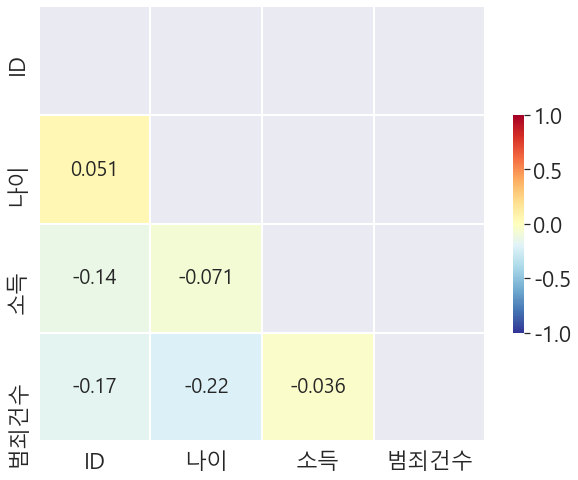

In [151]:
# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# corr 시각화
def corr_heatmap(dataset, method_option = 'pearson'):
    """[상관관계 그래프]

    Args:
        dataset ([DataFrame]): [데이터프래임을 입력해주세요]
        method_option (str, optional): [correlation을 도출하는 방식 선택]. Defaults to 'pearson' in addition, there are other options ('spearman', 'kendall').
        
    """
    # 라이브러리 호출
    
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # heatmap 그리기
    
    mask_ut=np.triu(np.ones(dataset.corr().shape)).astype(bool) 
    plt.figure(figsize=(10,8))
    sns.heatmap(dataset.corr(method=method_option), annot = True, cmap = 'RdYlBu_r', cbar_kws={"shrink": .5}, vmin=-1, vmax=1,
                annot_kws={"size": 20}, linewidths=.20, mask=mask_ut)
   
   
    plt.show()

# 함수 사용
corr_heatmap(crime_list)

# 범죄데이터 실습2 : 깃허브,  범죄데이터.csv

In [152]:
df = pd.read_csv("범죄데이터.csv",index_col=0)
df

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
12836330,JF407076,2022-09-22 23:00,010XX W RANDOLPH ST,810,절도,$500 초과,거리,False,False,1224,...,27.0,28,6,1169327.0,1901202.0,2022,01/03/2023 03:46:28 PM,41.884410,-87.653665,"(41.884410376, -87.653664839)"
12713141,JF259485,2022-05-29 0:00,014XX S MUSEUM CAMPUS DR,870,절도,주머니 훔치기,스포츠 아레나 / 경기장,False,False,132,...,4.0,33,6,NaN,NaN,2022,06/05/2022 04:48:59 PM,NaN,NaN,NaN
12837355,JF408212,2022-09-23 19:45,001XX W HURON ST,486,폭행,가정 폭력 간단한,인도,False,True,1832,...,2.0,8,08B,1175253.0,1905045.0,2022,01/03/2023 03:46:28 PM,41.894825,-87.631789,"(41.894824927, -87.631788635)"
12600669,JF122951,2022-01-24 17:30,018XX W GRAND AVE,910,자동차 절도,자동차,거리,False,False,1221,...,36.0,24,7,1164069.0,1903522.0,2022,07/06/2023 04:46:09 PM,41.890889,-87.672907,"(41.890889291, -87.672907259)"
12770469,JF328862,2022-07-23 16:00,069XX W 64TH PL,486,폭행,가정 폭력 간단한,주택,True,True,812,...,13.0,64,08B,1131307.0,1860969.0,2022,07/06/2023 04:46:09 PM,41.774746,-87.794208,"(41.774745709, -87.794208216)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13130030,JG328516,2022-06-17 0:01,004XX S LOTUS AVE,1153,사기적인 행위,재정적 ID 도용 $300 이상,아파트,False,False,1522,...,29.0,25,11,NaN,NaN,2022,07/05/2023 04:48:33 PM,NaN,NaN,NaN
13128041,JG326305,2022-12-01 0:00,049XX W WEST END AVE,1153,사기적인 행위,재정적 ID 도용 $300 이상,거리,False,False,1532,...,28.0,25,11,NaN,NaN,2022,07/05/2023 04:48:33 PM,NaN,NaN,NaN
13128260,JG325445,2022-10-02 16:15,082XX S DREXEL AVE,1153,사기적인 행위,재정적 ID 도용 $300 이상,NaN,False,False,631,...,8.0,44,11,NaN,NaN,2022,07/05/2023 04:48:33 PM,NaN,NaN,NaN


In [153]:
# 컬럼명 :  한글 로 변경 
df.columns =  ['사건 번호', '날짜','블록','IUCR','범죄 유형','설명','위치 설명','검거 여부','가정 내 범죄','경찰서 순번','지구','구','지역 번호','FBI 코드','X 좌표','Y 좌표','년도','업데이트 일자','위도','경도','위치']

In [154]:
#### 스피어만 상관계수를 비교하기 위한 인코딩 작업

In [155]:

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df["범죄 유형"])
df["범죄 유형"] = encoder.transform(df["범죄 유형"])

In [156]:
encoder = LabelEncoder()
encoder.fit(df["위치 설명"])
df["위치 설명"] = encoder.transform(df["위치 설명"])

In [157]:
encoder = LabelEncoder()
encoder.fit(df["설명"])
df["설명"] = encoder.transform(df["설명"])

In [158]:
# 상관계수를 확인하기 위한 컬럼 선택
df_cor = df[['범죄 유형', '설명', '위치 설명', '검거 여부', '가정 내 범죄', '위도', '경도']]
df_cor.corr('spearman')

,범죄 유형,설명,위치 설명,검거 여부,가정 내 범죄,위도,경도
범죄 유형,1.000000,-0.428856,0.069053,-0.114761,0.188582,0.038551,0.015399
설명,-0.428856,1.000000,-0.048972,0.050430,-0.182997,-0.022537,0.010591
위치 설명,0.069053,-0.048972,1.000000,-0.064055,0.158297,-0.024834,-0.008804
검거 여부,-0.114761,0.050430,-0.064055,1.000000,0.017862,0.007233,-0.041631
가정 내 범죄,0.188582,-0.182997,0.158297,0.017862,1.000000,-0.118160,0.007594
위도,0.038551,-0.022537,-0.024834,0.007233,-0.118160,1.000000,-0.540726
경도,0.015399,0.010591,-0.008804,-0.041631,0.007594,-0.540726,1.000000


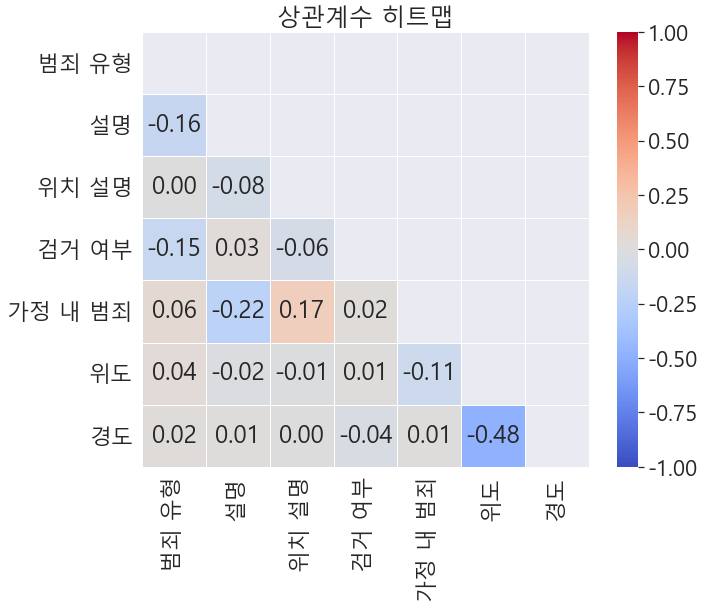

In [159]:
correlation_matrix = df_cor.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,vmin=-1, vmax=1)
plt.title('상관계수 히트맵')
plt.show()